<a href="https://colab.research.google.com/github/Omoyeemii/password/blob/main/data_subscription_in_Nigeria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   user_id                 200 non-null    object
 1   gender                  200 non-null    object
 2   age                     200 non-null    int64 
 3   network                 200 non-null    object
 4   region                  200 non-null    object
 5   recharge_type           200 non-null    object
 6   amount_₦                200 non-null    int64 
 7   recharge_time           200 non-null    object
 8   data_balance_MB         200 non-null    int64 
 9   last_recharge_days_ago  200 non-null    int64 
dtypes: int64(4), object(6)
memory usage: 15.8+ KB


<ipython-input-7-87bc2a020e09>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='recharge_type', palette='Set2')


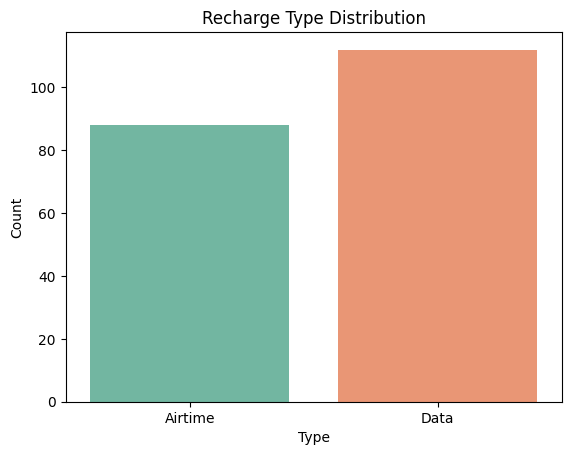

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv("nigeria_airtime_data_subscription_dummy.csv")

# Show first 5 rows
df.head()


df.info()
df.describe()
df['recharge_type'].value_counts()
df['region'].value_counts()

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='recharge_type', palette='Set2')
plt.title("Recharge Type Distribution")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()








<ipython-input-8-768a8172831d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='network', palette='Set3')


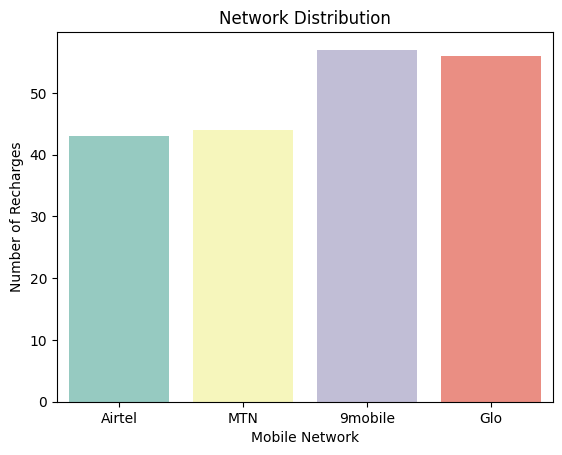

In [8]:
sns.countplot(data=df, x='network', palette='Set3')
plt.title("Network Distribution")
plt.xlabel("Mobile Network")
plt.ylabel("Number of Recharges")
plt.show()


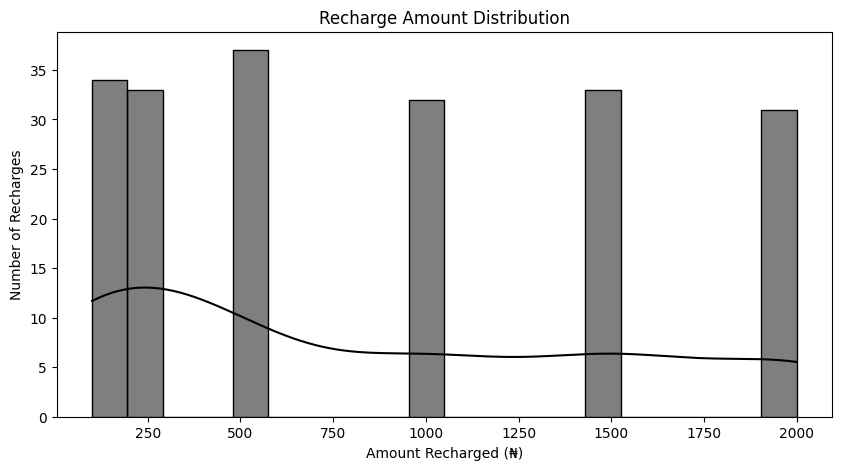

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='amount_₦', bins=20, kde=True, color='black')
plt.title("Recharge Amount Distribution")
plt.xlabel("Amount Recharged (₦)")
plt.ylabel("Number of Recharges")
plt.show()





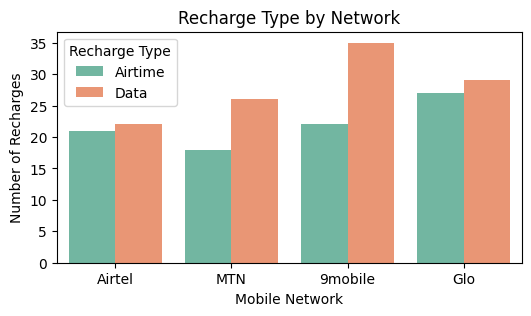

In [16]:
plt.figure(figsize=(6,3))
sns.countplot(data=df, x='network', hue='recharge_type', palette='Set2')
plt.title("Recharge Type by Network")
plt.xlabel("Mobile Network")
plt.ylabel("Number of Recharges")
plt.legend(title="Recharge Type")
plt.show()


In [18]:
df.head()



,user_id,gender,age,network,region,recharge_type,amount_₦,recharge_time,data_balance_MB,last_recharge_days_ago
0,U001,Male,19,Airtel,Abuja,Airtime,200,2025-03-28 18:55,0,2
1,U002,Female,20,MTN,Lagos,Airtime,200,2025-04-04 03:37,0,6
2,U003,Female,32,9mobile,Ibadan,Data,100,2025-03-27 16:54,200,10
3,U004,Female,27,Glo,Kano,Airtime,100,2025-04-08 19:16,0,11
4,U005,Female,20,9mobile,Ibadan,Airtime,1000,2025-04-18 05:20,0,11


In [22]:
# 1. Handle missing data (if any)
df = df.dropna()

# 2. Convert categorical data using One-Hot Encoding
df = pd.read_csv('/content/nigeria_airtime_data_subscription_dummy.csv')


# 3. Scale numerical data (for models like SVM, Neural Networks, etc.)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['amount_₦'] = scaler.fit_transform(df[['amount_₦']])

# 4. Split the data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('recharge_type', axis=1)  # Features (all columns except recharge_type)
y = df['recharge_type']  # Target variable (what we're predicting)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split
print(f"Training Data Size: {len(X_train)}")
print(f"Testing Data Size: {len(X_test)}")


Training Data Size: 160
Testing Data Size: 40


In [25]:
# Convert the recharge_type column to numeric: 'airtime' -> 0, 'data' -> 1
df['recharge_type'] = df['recharge_type'].map({'airtime': 0, 'data': 1})



In [27]:
# Define features and target again
X = df.drop('recharge_type', axis=1)
y = df['recharge_type']

# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then run the Logistic Regression code again


In [29]:
# Define features and target again
X = df.drop('recharge_type', axis=1)
y = df['recharge_type']

# Split again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then run the Logistic Regression code again


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 1. Create the model
model = LogisticRegression()

# 2. Train the model on the training set
model.fit(X_train, y_train)

# 3. Predict on the test set
y_pred = model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: could not convert string to float: 'U080'

In [31]:
# First, check your feature columns
print(X.columns)
print(X.dtypes)


Index(['user_id', 'gender', 'age', 'network', 'region', 'amount_₦',
       'recharge_time', 'data_balance_MB', 'last_recharge_days_ago'],
      dtype='object')
user_id                    object
gender                     object
age                         int64
network                    object
region                     object
amount_₦                  float64
recharge_time              object
data_balance_MB             int64
last_recharge_days_ago      int64
dtype: object


In [33]:
X = X.drop(['user_id', 'gender', 'network', 'region' 'recharge_time'], axis=1, errors='ignore')


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [37]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- gender
- network
- user_id


In [40]:
X = pd.get_dummies(X, drop_first=True)
# 3. Now split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train your model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 5. Predict and evaluate
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ValueError: Input y contains NaN.

In [41]:
# 1. Handle missing data in BOTH features and target
df = df.dropna(subset=['recharge_type'])  # Drop rows where 'recharge_type' is NaN
df = df.dropna()  # Drop rows where any other feature is NaN


# 2. Convert categorical data using One-Hot Encoding
# Assuming you want to keep 'user_id', 'gender', 'network', 'region', 'recharge_time'
# Replace this line if you want to drop some of them
categorical_features = ['user_id', 'gender', 'network', 'region', 'recharge_time']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


# 3. Scale numerical data (for models like SVM, Neural Networks, etc.)
# ... [Your existing scaling code for 'amount_₦'] ...


# 4. Split the data into train and test sets
X = df.drop('recharge_type', axis=1)  # Features
y = df['recharge_type']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train your model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [42]:
# 1. Handle missing data in BOTH features and target
# Instead of dropping all rows with any missing values, consider imputation
# or dropping only columns with a high percentage of missing values.
# For example, to fill missing values with the mean:
# df = df.fillna(df.mean())  # Replace with appropriate imputation strategy

# Alternatively, to drop columns with more than 50% missing values:
# threshold = 0.5
# df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)

# 2. Convert categorical data using One-Hot Encoding
categorical_features = ['user_id', 'gender', 'network', 'region', 'recharge_time']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dummy_na=False)

# 3. Scale numerical data
# ... [Your existing scaling code for 'amount_₦'] ...

# 4. Split the data into train and test sets
X = df.drop('recharge_type', axis=1)  # Features
y = df['recharge_type']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train your model
# ... [Your model training code] ...

# 6. Predict and evaluate
# ... [Your model evaluation code] ...

KeyError: "None of [Index(['user_id', 'gender', 'network', 'region', 'recharge_time'], dtype='object')] are in the [columns]"

In [44]:
# Reload the dataset to ensure df is not empty
import pandas as pd
df = pd.read_csv("nigeria_airtime_data_subscription_dummy.csv")

# 1. Handle missing data in BOTH features and target
# Instead of dropping all rows with any missing values, consider imputation
# or dropping only columns with a high percentage of missing values.
# For example, to fill missing values with the mean:
# df = df.fillna(df.mean())  # Replace with appropriate imputation strategy

# Alternatively, to drop columns with more than 50% missing values:
# threshold = 0.5
# df = df.dropna(thresh=len(df) * (1 - threshold), axis=1)

# 2. Convert categorical data using One-Hot Encoding
categorical_features = ['user_id', 'gender', 'network', 'region', 'recharge_time']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True, dummy_na=False)

# 3. Scale numerical data
# ... [Your existing scaling code for 'amount_₦'] ...

# 4. Split the data into train and test sets
X = df.drop('recharge_type', axis=1)  # Features
y = df['recharge_type']  # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train your model
# ... [Your model training code] ...

# 6. Predict and evaluate
# ... [Your model evaluation code] ...

In [45]:
# 5. Train your model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.875

Classification Report:
               precision    recall  f1-score   support

     Airtime       0.74      1.00      0.85        14
        Data       1.00      0.81      0.89        26

    accuracy                           0.88        40
   macro avg       0.87      0.90      0.87        40
weighted avg       0.91      0.88      0.88        40



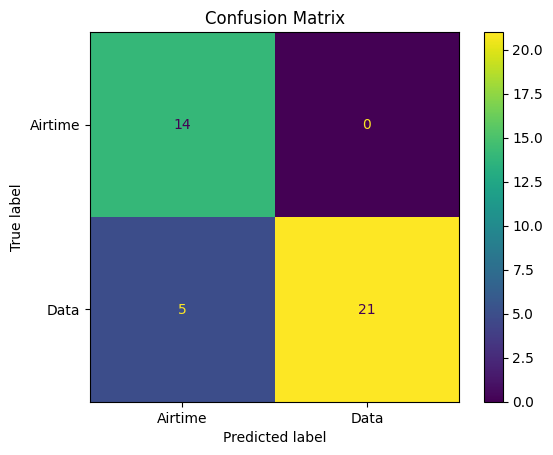

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()
